# Case study on Grouping Engineering College

## Problem Statement

You are an independent trainer who would like to pitch your Data Science training program to a set of Engineering colleges. You have data of 26 colleges after survey using questionnaires. Each college has been given a score for 5 performance criteria-Teaching, Fees, Placement, Internship & Infrastructure. Ratings are in the standardized scale of 1 to 5 where 5 has a higher weightage than 1. Segment the colleges into groups and come up with your pitch recommendations for each segment.

### Objective

To segment 26 colleges into group and state each segment.

### Attributes

Variable Description:

1. SR_NO

2. Engg_College

3. Teaching

4. Fees

5. Placement

6. Internship

7. Infrastructure

### Table of Content

1.Import Libraries

2.Setting options

3.Read Data

4.Data Analysis and Preparation

    4.1 - Understanding the Dataset
    
    4.1.1 - Data Types

    4.1.2 - Summary Statistics

    4.1.3 - Missing Value check

    4.1.4 - Discover Outliers with Visualization

5.Univariate Analysis


6.Multivariate Analysis 

    6.1 - Visualizing features having strongest relation with target variable


7.Data Preparation

8.Creating the Dendograms

9.Creating cluster

10.Cluster Profile

11.Recommendation and conclusion



### Importing Necessary Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection  import train_test_split
# from sklearn.cluster import KMeans
# from scipy.stats import zscore
#import sklearn.metrics

### Setting Options

In [48]:
#Suppressing warnings
warnings.filterwarnings('ignore')

### Reading data

In [49]:
#loading dataset
df = pd.read_csv('Engg_college_Data.csv')

### Data Analysis and Data Preparation

In [50]:
#viewing data
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [51]:
#checking dimension of data
df.shape

(26, 7)

In [52]:
#Checking attributes
df.columns

Index(['SR_NO', 'Engg_College', 'Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure'],
      dtype='object')

In [53]:
#Checking datatypes
df.dtypes

SR_NO              int64
Engg_College      object
Teaching           int64
Fees               int64
Placements         int64
Internship         int64
Infrastructure     int64
dtype: object

In [54]:
#Checking null values
df.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

In [55]:
#Checking duplicate values
df.duplicated().sum()

0

In [56]:
#Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


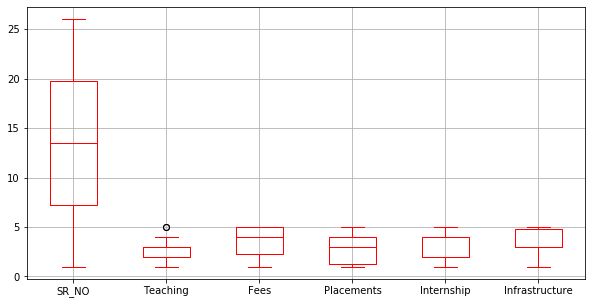

In [57]:
#Checking outliers
df.boxplot(figsize=(10,5),color='red')

#### Get the count of unique values for Engg_College

In [58]:
df.Engg_College.nunique()

26

#### Get the unique values for Engg_College

In [59]:
df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

### Univariate Analysis

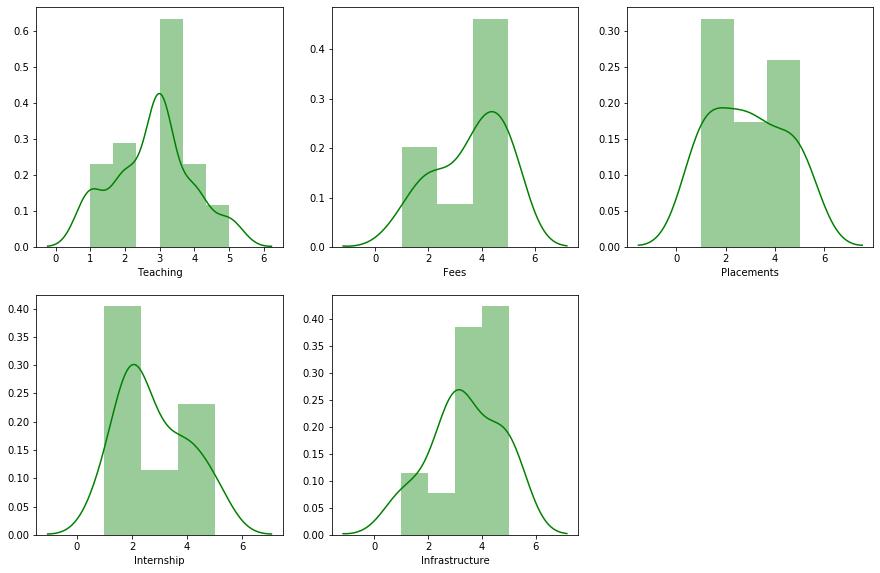

In [60]:
Cols = ['Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure']
pos =1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(3,3,pos)
    sns.distplot(df[i],hist=True,color='green')
    pos+=1


Teaching : Normally distributed

Fees : Right Skewed

Placement : Normally distributed

Internship : Bimodal distributions

Infrastructure : Normally distributed

### Multivaraite Analysis

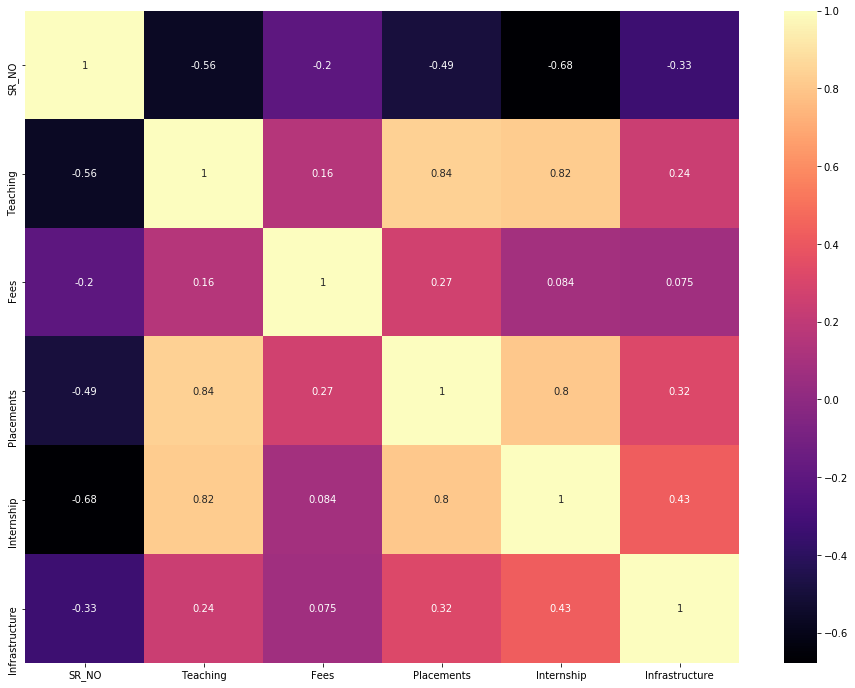

In [61]:
#chekcing correlation between independent varaibles
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma')

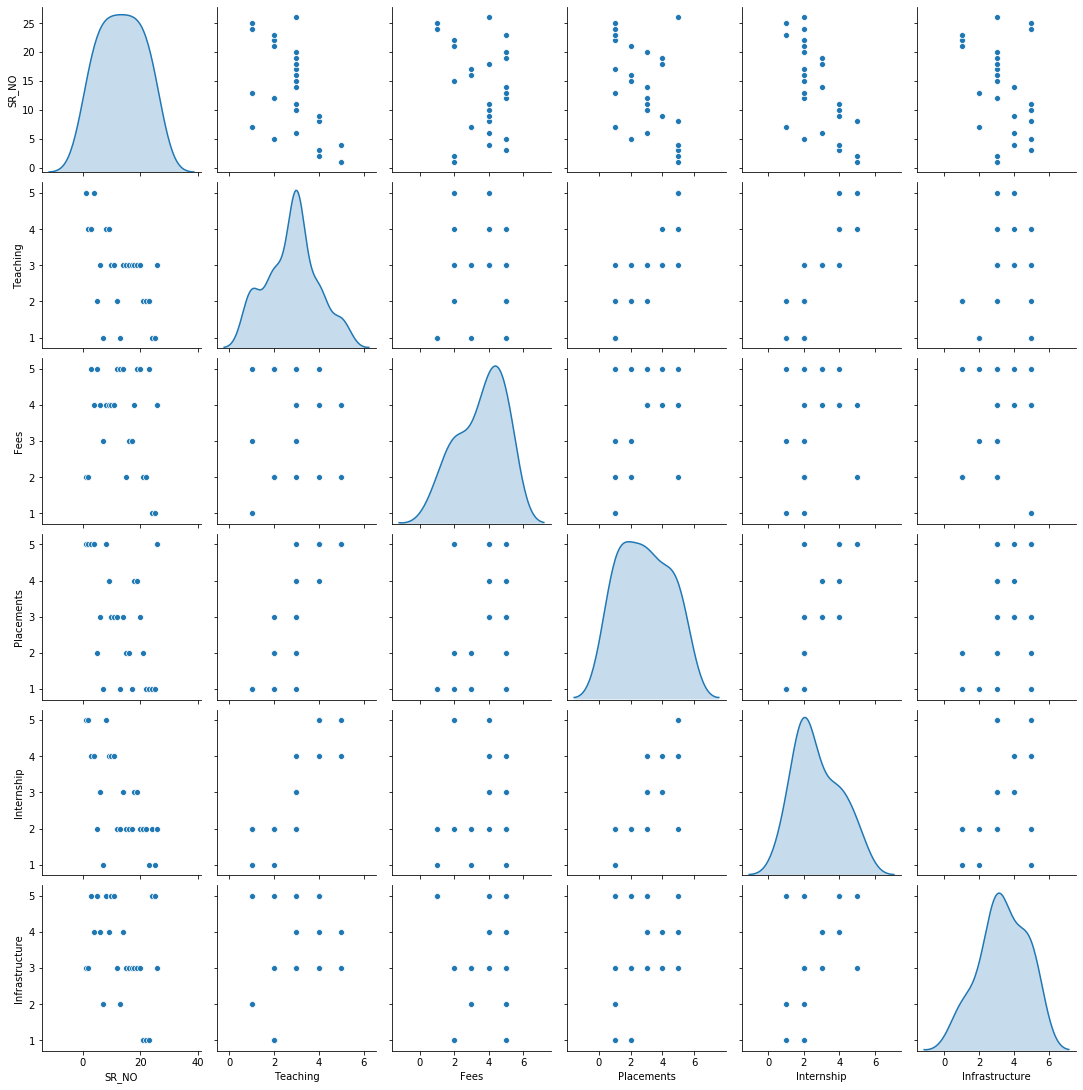

In [62]:
sns.pairplot(df,diag_kind='kde')

There is correlation between Placement and Teaching and vice versa.

Also, correlation between Internship and teaching and vice versa.

### Data Preparation

Removing SR_NO as it is of no use. But before that create a copy original dataset so that original dataset remains unaffected.

In [63]:
df1 = df.copy(deep=True)

df1 = df1.drop(['SR_NO'],axis=1)
df1.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


### Creating the Dendrogram

In [65]:
# Importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
# Choosing average linkage method
link_method = linkage(df.iloc[:,2:6],method = 'average')

In [67]:
labelList = np.array(df1.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

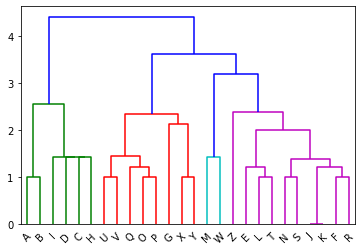

In [68]:
dend = dendrogram(link_method,labels = labelList)

By looking at dendogram , we can observe that we can form 3 clusters.

### Creating Cluster

In [69]:
#Importing fcluster module to create clusters
from scipy.cluster.hierarchy import fcluster

#Setting criterion as maxclust then create 3 clusters and store the results in another object 'clusters'
clusters = fcluster(link_method , 3, criterion = 'maxclust')
clusters

array([1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2,
       3, 2, 2, 3], dtype=int32)

In [70]:
# Appending Cluster to dataset

df1['cluster'] = clusters
df1.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster
0,A,5,2,5,5,3,1
1,B,4,2,5,5,3,1
2,C,4,5,5,4,5,1
3,D,5,4,5,4,4,1
4,E,2,5,2,2,5,3


In [71]:
#Checking no. of records in cluster

df1['cluster'].value_counts().sort_index()

1     6
2     8
3    12
Name: cluster, dtype: int64

### Cluster Profile

In [72]:
aggdata=df1.iloc[:,1:8].groupby('cluster').mean()
aggdata['Freq']= df1['cluster'].value_counts().sort_index()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
cluster,,,,,,
1,4.333333,3.500000,4.833333,4.500000,4.000000,6
2,2.000000,2.125000,1.375000,1.750000,2.875000,8
3,2.583333,4.583333,2.916667,2.583333,3.416667,12


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

### Recommendation and conclusion

1. For companies hiring, should go to colleges for Placements which are Tier 1 colleges, followed by Tier 2 colleges.
2. For companies providing Training program to staffs and students,should go to colleges which are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges.